<a href="https://colab.research.google.com/github/rokzeezee/Machine-Learning-/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
diabetes_df=pd.read_csv("/content/diabetes (1).csv")
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [31]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [14]:
diabetes_df["Outcome"].nunique()

2

In [25]:
y= diabetes_df.iloc[:,8]
y


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [23]:
X = diabetes_df.iloc[:, 0 : 7]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,6,148,72,35,0,33.6,0.627
1,1,85,66,29,0,26.6,0.351
2,8,183,64,0,0,23.3,0.672
3,1,89,66,23,94,28.1,0.167
4,0,137,40,35,168,43.1,2.288
...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171
764,2,122,70,27,0,36.8,0.340
765,5,121,72,23,112,26.2,0.245
766,1,126,60,0,0,30.1,0.349


In [32]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [28]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train , y_test =train_test_split(X,y ,test_size= 0.2 ,random_state= 1)
X_train.shape ,X_test.shape ,y_train.shape , y_test.shape 

((614, 7), (154, 7), (614,), (154,))

In [36]:
import math
math.sqrt(len(y_test))


12.409673645990857

In [38]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=11 ,p = 2 ,metric="euclidean")

KNN.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [39]:
KNN_model = KNN.fit(X_train,y_train)

In [41]:
pred = KNN_model.predict(X_test)

In [47]:
Score=KNN_model.score(X_test ,y_test)
Score

0.7727272727272727

In [45]:
from sklearn.metrics import accuracy_score

score2 = accuracy_score(y_test , pred) 
     
score2

0.7727272727272727

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , pred)

cm

array([[86, 13],
       [22, 33]])

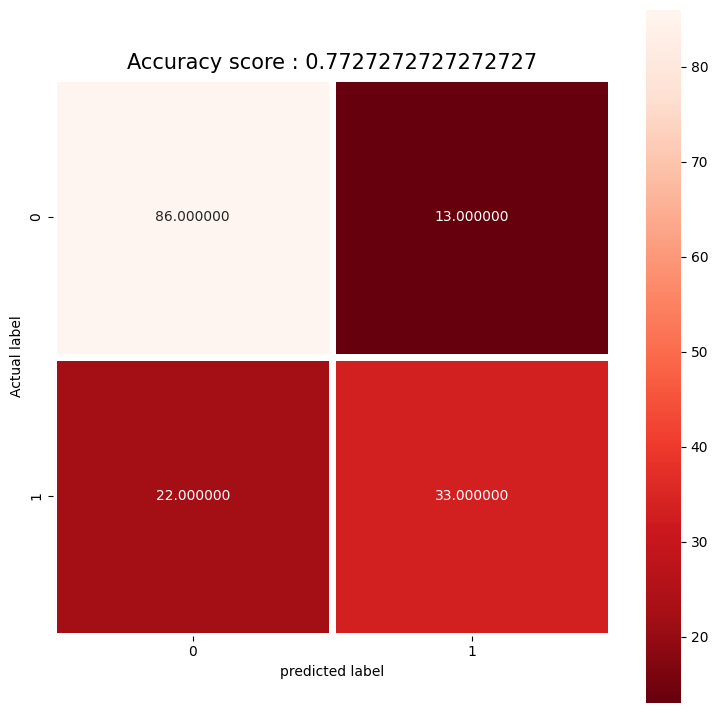

In [50]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm , annot=True ,fmt="3f" ,linewidths= 5, square = True ,cmap="Reds_r");
plt.ylabel("Actual label");
plt.xlabel ("predicted label");
all_sample_title = "Accuracy score : {0}".format( score2);
plt.title(all_sample_title ,size = 15);
     

In [51]:
 from sklearn.metrics import classification_report
 cp = classification_report(y_test,pred)
 print("classification _report" ,cp )
     

classification _report               precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.72      0.60      0.65        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



In [58]:
from sklearn.metrics import f1_score

f1_score(y_test,pred)

0.6534653465346534